In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df2 = pd.read_csv("csv/20151016135827-NAV-GBR.csv")
df2.head()

,Boat,Date,Secs,LocalTime,Zone,Lat,Lon,Hdg,Heel,Pitch,...,yHdg,ySpeed,yTWS,yTWD,yAWS,yAWA,yTWA,ySOG,yCOG,yRudder
0,GBR,16:10:2015,50308.404,13:58:28.404,-3,32.299371,-64.825425,30.3,0.5,-0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GBR,16:10:2015,50308.604,13:58:28.604,-3,32.299373,-64.825425,30.5,0.5,-0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GBR,16:10:2015,50308.804,13:58:28.804,-3,32.299374,-64.825424,30.9,0.4,-0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GBR,16:10:2015,50309.004,13:58:29.004,-3,32.299376,-64.825424,31.3,0.5,-0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GBR,16:10:2015,50309.204,13:58:29.204,-3,32.299377,-64.825424,31.7,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


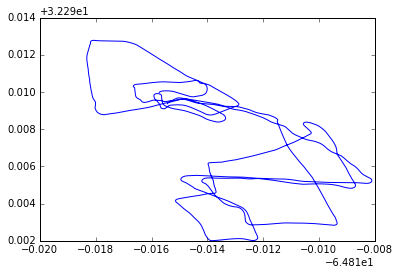

In [3]:
plt.plot(df2.Lon, df2.Lat)

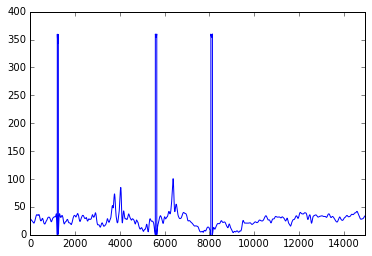

In [4]:
df2.CourseWindDirection.plot()
#note the spikes in the graph below, that's where the wind direction crossed from 1 degree to 359 degrees. 
#they make the plot discontinuous

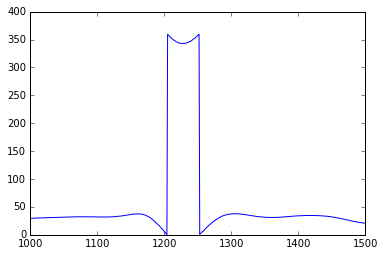

In [5]:
df2.ix[1000:1500].CourseWindDirection.plot()
#here is a zoomed in discontinuity

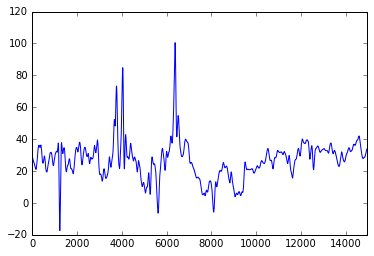

In [6]:
fluc_df = df2
fluc_cwd = fluc_df.CourseWindDirection.copy()
#fluc_cwd.plot()
# I can make this correction for wind because all wind angles are between 330 and 100 degrees or 100 degrees and - 30
fluc_cwd[fluc_cwd > 180] -= 360 
fluc_cwd.plot()

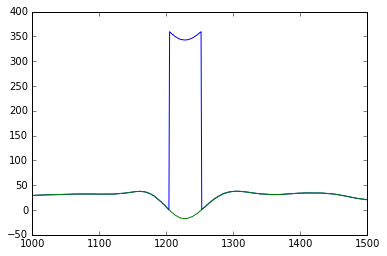

In [7]:
#here we can see that the discontinuity was succesfully shifted down
df2.ix[1000:1500].CourseWindDirection.plot()
fluc_cwd.ix[1000:1500].plot()

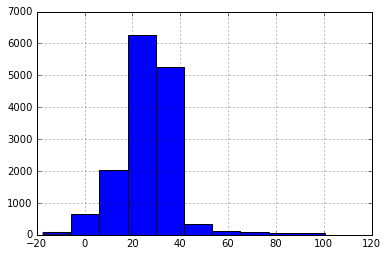

In [8]:
fluc_cwd.hist()

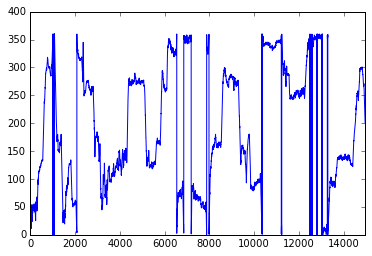

In [9]:
#the course over ground plot is much messier and we can't make the same conversion.  
# The boat basically does laps (circles) around the course

df2.COG.plot()

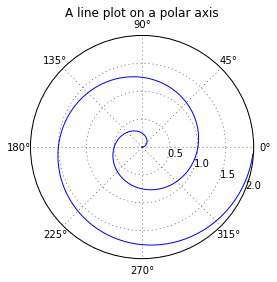

In [10]:
# a traditional polar plot
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

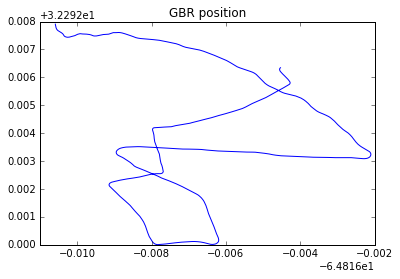

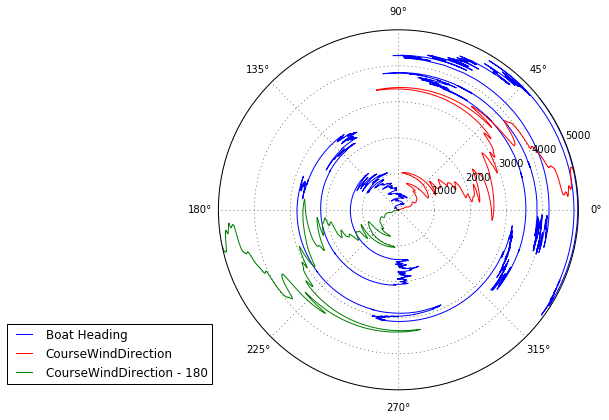

In [11]:
# here we create df3 to represent a subsection of the race.

start,end = 3000, 8000
df3 = df2[start:end].copy()
df3.index -= start
df3.COG  *= np.pi/180
df3.CourseWindDirection *= np.pi/180
df3['TackWindDirection'] = df3.CourseWindDirection - np.pi
ax1 = plt.subplot()
plt.plot(df3.Lon, df3.Lat)
ax1.set_title('GBR position')
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1], polar=True)
COG_h, = ax.plot(df3.COG, df3.index, label='Boat Heading')
cwd_h, = ax.plot(df3.CourseWindDirection, df3.index, color='red', label="CourseWindDirection")
cwd_180_h, = ax.plot(df3.TackWindDirection, df3.index, color='green', label='CourseWindDirection - 180')
ax.grid(True)
plt.legend(handles=[COG_h, cwd_h, cwd_180_h], bbox_to_anchor=(0, 0.2))
plt.show()

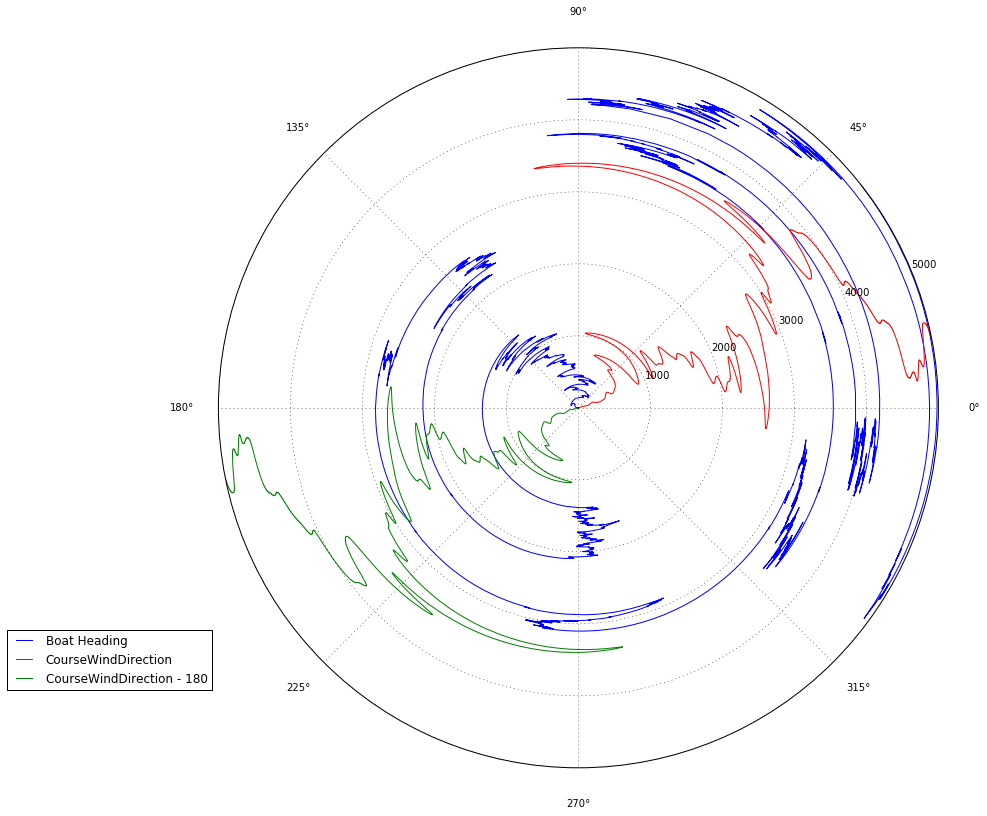

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1], polar=True)

COG_h, = ax.plot(df3.COG, df3.index, label='Boat Heading')
cwd_h, = ax.plot(df3.CourseWindDirection, df3.index, color='red', label="CourseWindDirection")
cwd_180_h, = ax.plot(df3.TackWindDirection, df3.index, color='green', label='CourseWindDirection - 180')
ax.grid(True)
plt.legend(handles=[COG_h, cwd_h, cwd_180_h], bbox_to_anchor=(0, 0.2))

plt.show()